<a href="https://colab.research.google.com/github/ViruniRuvinya/Image-Classification---CNN/blob/main/Cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: viruniruvinya"
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:11<00:00, 19.0MB/s]


In [4]:
Batch_size=32
Image_size=(128,128)

In [5]:
train_data_dir='/content/cats-and-dogs-for-classification/cats_dogs/train'
test_data_dir='/content/cats-and-dogs-for-classification/cats_dogs/test'

In [6]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=Batch_size,
                                                       image_size=Image_size,
                                                       subset='training',
                                                       validation_split=0.1,
                                                       seed=42)

validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=Batch_size,
                                                       image_size=Image_size,
                                                       subset='validation',
                                                       validation_split=0.1,
                                                       seed=42)

test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                       batch_size=Batch_size,
                                                       image_size=Image_size)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
class_names=train_data.class_names
class_names

['cats', 'dogs']

In [8]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


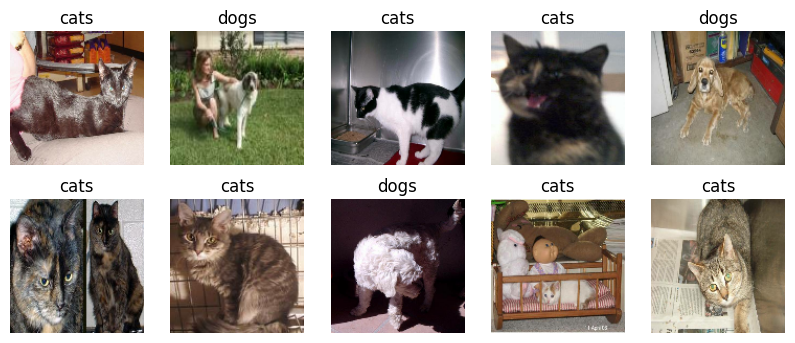

In [9]:
#plot data
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')


### Data Preprocessing

In [10]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

Feature Scaling(normalizing values)

In [11]:
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

Data Augmentation

In [12]:
data_augmentation=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Build a model

In [17]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



In [18]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model training

In [20]:
start_time=time.time()

history=model.fit(train_data,epochs=20,validation_data=validation_data)

end_time=time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5453 - loss: 0.7206 - val_accuracy: 0.5975 - val_loss: 0.6736
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.6063 - loss: 0.6595 - val_accuracy: 0.6012 - val_loss: 0.6508
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6330 - loss: 0.6346 - val_accuracy: 0.5163 - val_loss: 0.9567
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6702 - loss: 0.6147 - val_accuracy: 0.6988 - val_loss: 0.5878
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6690 - loss: 0.6016 - val_accuracy: 0.6725 - val_loss: 0.6622
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6802 - loss: 0.5854 - val_accuracy: 0.7075 - val_loss: 0.6074
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6933 - loss: 0.5781 - val_accuracy: 0.5925 - val_loss: 0.9014
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7092 - loss: 0.5563 - val

In [21]:
history.history

{'accuracy': [0.5631944537162781,
  0.6152777671813965,
  0.6430555582046509,
  0.6744444370269775,
  0.675694465637207,
  0.6901388764381409,
  0.6984722018241882,
  0.7156944274902344,
  0.7225000262260437,
  0.7343055605888367,
  0.7430555820465088,
  0.7501388788223267,
  0.7527777552604675,
  0.761388897895813,
  0.7683333158493042,
  0.7666666507720947,
  0.7816666960716248,
  0.784166693687439,
  0.7919444441795349,
  0.7977777719497681],
 'loss': [0.6896360516548157,
  0.6518324017524719,
  0.6266499161720276,
  0.6071742177009583,
  0.593941330909729,
  0.5804916024208069,
  0.5714403390884399,
  0.5537023544311523,
  0.543133556842804,
  0.5298906564712524,
  0.5126588940620422,
  0.5121886134147644,
  0.5025259256362915,
  0.48869413137435913,
  0.4787057638168335,
  0.47512736916542053,
  0.46281176805496216,
  0.4508795440196991,
  0.44330906867980957,
  0.43337777256965637],
 'val_accuracy': [0.5975000262260437,
  0.6012499928474426,
  0.5162500143051147,
  0.698750019073

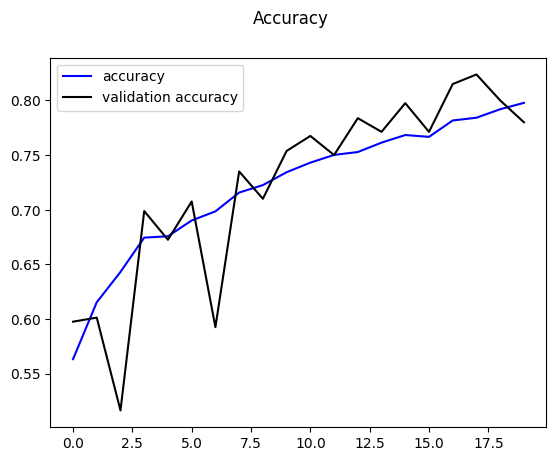

In [22]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'],color='black',label='validation accuracy')
fig.suptitle('Accuracy')
plt.legend()
plt.show()

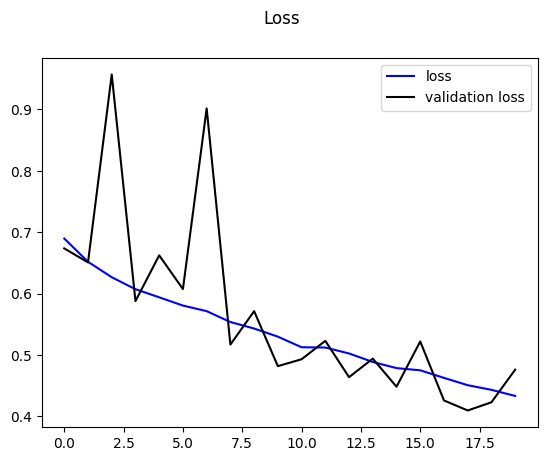

In [23]:
fig=plt.figure()
plt.plot(history.history['loss'],color='blue',label='loss')
plt.plot(history.history['val_loss'],color='black',label='validation loss')
fig.suptitle('Loss')
plt.legend()
plt.show()

### Model Evaluation

In [26]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

In [27]:
for batch in test_data.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [29]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8837535>

In [30]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.631>

In [31]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.774>

In [32]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

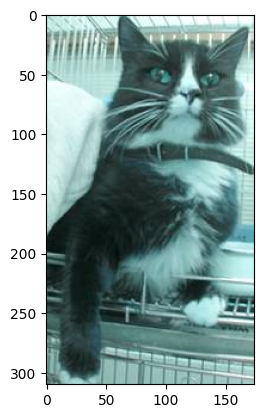

In [33]:
image=cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4007.jpg')
plt.imshow(image)
plt.show

In [34]:
resized_img=tf.image.resize(image,Image_size)
scaled_img=resized_img/255

In [35]:
scaled_img

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.78000534, 0.89765245, 0.8780446 ],
        [0.7675039 , 0.88515097, 0.8655431 ],
        [0.80204266, 0.9196897 , 0.9000819 ],
        ...,
        [0.97851586, 0.99800855, 0.997212  ],
        [0.9078108 , 0.9579384 , 0.94957274],
        [0.88810366, 0.9551272 , 0.94386345]],

       [[0.8183151 , 0.9438053 , 0.92419744],
        [0.719851  , 0.8453412 , 0.82573336],
        [0.642474  , 0.7679642 , 0.74835634],
        ...,
        [0.9973707 , 0.99930924, 0.99896383],
        [0.9420549 , 0.9715074 , 0.966299  ],
        [0.89727664, 0.94571245, 0.9379629 ]],

       [[0.7944202 , 0.92426085, 0.9024778 ],
        [0.776618  , 0.90645874, 0.8846756 ],
        [0.81394136, 0.9437821 , 0.921999  ],
        ...,
        [0.9728183 , 1.        , 1.        ],
        [0.9374165 , 0.9809214 , 0.9763035 ],
        [0.86954755, 0.9321701 , 0.9221517 ]],

       ...,

       [[0.34994638, 0.47915947, 0.45520115],
        [0.35

expand dimensions

In [36]:
np.expand_dims(scaled_img,0).shape

(1, 128, 128, 3)

In [37]:
y_hat=model.predict(np.expand_dims(scaled_img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [38]:
y_hat

array([[0.5663846]], dtype=float32)

In [39]:
class_names

['cats', 'dogs']

In [41]:
if y_hat>=0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs
